Import all libraries

In [3]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Normalize MNIST dataset and PCA

In [4]:
train = pd.read_csv("train.csv")

Separating out the features

In [5]:
x = train.iloc[:,1:].values

Separating out the label

In [6]:
y = train.loc[:,['label']].values

Standardizing the features

In [7]:
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=300)
principalComponents = pca.fit_transform(x)
principalDf300 = pd.DataFrame(data=principalComponents)

DIGITS_PCA_300 = pd.concat([principalDf300, train[['label']]], axis = 1)

# K_MEANS

Make a test over different number of clusters

In [8]:
center_list = []
kmiterlist = []
kmeans_list = [20, 30, 40, 50, 60]

purity_list = []
for i in range(0, len(kmeans_list)):

    km = KMeans(n_clusters=kmeans_list[i], init="random", n_init=1).fit(principalDf300)

    print("kmeans_number_of_iterations :", km.n_iter_)
    kmiterlist.append(km.n_iter_)

    y_kmeans = km.predict(principalDf300)
    df_temp = pd.DataFrame(y, y_kmeans, columns=["True"]).reset_index()

    majority_count_value = 0

    for i in df_temp["index"].unique():
        df_inner = df_temp[df_temp["index"] == i]
        count_true_val = df_inner["True"].value_counts()
        majority_count_value += count_true_val.iloc[0]

    majority_purity_label = majority_count_value / 42000
    purity_list.append(majority_purity_label)

kmeans_number_of_iterations : 94
kmeans_number_of_iterations : 68
kmeans_number_of_iterations : 135
kmeans_number_of_iterations : 153
kmeans_number_of_iterations : 110


Purity over K-values graph

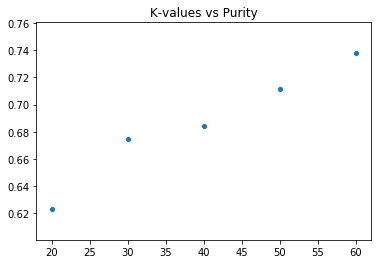

In [9]:
sns.scatterplot(kmeans_list, purity_list)
plt.title("K-values vs Purity")
plt.show()

# SVM
Separating the X and Y variable

In [10]:
y = DIGITS_PCA_300['label']

Dropping the variable 'label' from X variable

In [11]:
X = DIGITS_PCA_300.drop(columns='label')

train test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.2 ,random_state = 10)

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

predict

In [13]:
y_pred = model_linear.predict(X_test)

from sklearn import metrics

accuracy

In [14]:
print("accuracy_model_linear:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy_model_linear: 0.9044444444444445 

[[1158    0    1    4    5    5   12    2    1    0]
 [   0 1384    3    3    3    1    0    4   15    0]
 [   8   13 1131   38    9    4   14   16   24    3]
 [   5    5   49 1184    0   54    1    4   23    6]
 [   2    3   17    3 1131    1   12    5    1   43]
 [  13   16   16   77    9  979   14    2   19    4]
 [  15    3   19    0   14   26 1140    2    0    0]
 [   5   11   12   21   21    2    0 1207    4   47]
 [   9   34   28   54    9   55   11    9  990   18]
 [   9    8    8   27   66    5    1   53    6 1092]]


non-linear model
using rbf kernel, C=1, default value of gamma

In [15]:
non_linear_model = SVC(kernel='rbf')

fit

In [16]:
non_linear_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

predict

In [17]:
y_pred = non_linear_model.predict(X_test)

confusion matrix and accuracy

accuracy

In [18]:
print("accuracy_non-linear model:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

accuracy_non-linear model: 0.9377777777777778 



confusion_matrix

In [19]:
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[1158    0    5    1    0    3   11    5    4    1]
 [   0 1391    4    3    3    0    1    6    5    0]
 [   3    4 1171   17    5    0   10   33   15    2]
 [   1    5   19 1241    0   19    2   28   13    3]
 [   0    4   23    1 1137    0    9   15    3   26]
 [   0    6    4   42    3 1053   18   10    7    6]
 [  11    2    5    0    2   16 1158   23    2    0]
 [   3   10    8    4   14    0    0 1259    1   31]
 [   3   19   12   24    8   21    7   16 1100    7]
 [   3    3    4   27   22    2    1   59    6 1148]]


finding the model with optimal hyperparameters and creating a KFold object with 5 splits

In [20]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

specify range of hyperparameters
Set the parameters by cross-validation

In [21]:
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

specify model

In [22]:
model = SVC(kernel="rbf")

set up GridSearchCV()

In [23]:
model_cv = GridSearchCV(estimator = model,
                        param_grid = hyper_params,
                        scoring= 'accuracy',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

fit the model

In [24]:
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
print("results........")
print(cv_results)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

converting C to numeric type for plotting on x-axis

In [ ]:
cv_results['param_C'] = cv_results['param_C'].astype('int')

plotting parameters test statistics

In [ ]:
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

plt.show()

printing the optimal accuracy score and hyperparameters

In [ ]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))


model with optimal hyperparameters

In [ ]:
model = SVC(C=5, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics

In [ ]:
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

# KNN

Separating the X and Y variable

In [ ]:
y = DIGITS_PCA_300['label']

Dropping the variable 'label' from X variable

In [ ]:
X = DIGITS_PCA_300.drop(columns='label')

train test split and keep 25% for testing

In [ ]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25, random_state=42)

now, let's take 10% of the training data and use that for validation

In [ ]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, test_size=0.1, random_state=84)

initialize the values of k for our k-Nearest Neighbor classifier along with the
list of accuracies for each value of k

In [ ]:
kVals = range(1, 30, 2)
accuracies = []

loop over various values of `k` for the k-Nearest Neighbor classifier

In [ ]:
for k in range(1, 30, 2):
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)
    # evaluate the model and update the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

find the value of k that has the largest accuracy

In [ ]:
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
                                                                       accuracies[i] * 100))

re-train our classifier using the best k value and predict the labels of the test data

In [ ]:
model = KNeighborsClassifier(n_neighbors=kVals[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)

show a final classification report demonstrating the accuracy of the classifier
for each of the digits

In [ ]:
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

print("Confusion matrix")
print(confusion_matrix(testLabels, predictions))


